In [1]:
import tensorflow as tf
tf.executing_eagerly()
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(
    allow_soft_placement=True,
    log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1060 3GB, pci bus id: 0000:06:00.0, compute capability: 6.1



In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

print(tf.__version__)

2.1.0


In [5]:
import os
import json
from glob import glob

In [6]:
TRAIN_PREFIX = 'data\\train'

def load_annotations(path):
    boxes = dict()
    for path in glob(path+'\\*.json'):
        label = os.path.basename(path).split('_', 1)[0]
        with open(path) as src:
            for annot in json.load(src):
                basename = os.path.basename(annot['filename']).replace('.xml', '.JPG')
                annot['filename'] = os.path.join(
                    TRAIN_PREFIX, basename)
                rect = annot['annotation']
                rect['x'] += rect['width'] / 2
                rect['y'] += rect['height'] / 2
                if os.path.isfile(annot['filename']):
                    boxes.setdefault(label, []).append(annot)
    return boxes

def draw_boxes(annotation, rect=None, image_size=None):
    
    def _draw(img, rect, scale_x, scale_y, color=(0, 255, 0)):

        pt1 = (int((rect['x'] - rect['width'] / 2) * scale_x),
                int((rect['y'] - rect['height'] / 2) * scale_y))
        pt2 = (int((rect['x'] + rect['width'] / 2) * scale_x),
                int((rect['y'] + rect['height'] / 2) * scale_y))
        img = cv2.rectangle(img.copy(), pt1, pt2, 
                            color=color, thickness=4)
        
#         font                   = cv2.FONT_HERSHEY_SIMPLEX
#         bottomLeftCornerOfText = (int((rect['x'] - rect['width'] / 2) * scale_x),
#                                     int((rect['y'] - rect['height'] / 2) * scale_y)-10)
#         fontScale              = 1
#         fontColor              = (0,255,255)
#         lineType               = 2
#         img = cv2.putText(img.copy(),rect['number'], 
#                             bottomLeftCornerOfText, 
#                             font, 
#                             fontScale,
#                             fontColor,
#                             lineType)
              
        return img
    
    scale_x, scale_y = 1., 1.
    img = plt.imread(annotation['filename'], cv2.IMREAD_COLOR)
    if image_size is not None:
        scale_x = 1. * image_size[0] / img.shape[1]
        scale_y = 1. * image_size[1] / img.shape[0]
        img = cv2.resize(img, image_size)
    if len(annotation)>1:     
        img = _draw(img, annotation.get('annotation', []), scale_x, scale_y)
    
    if rect is not None:
        img = _draw(img, rect, 1., 1., (255, 0, 0))

    return img

In [7]:
boxes = load_annotations(TRAIN_PREFIX)

In [8]:
boxes

{'autonumber': [{'annotation': {'class': 'rect',
    'width': 189.0,
    'height': 69.0,
    'x': 984.5,
    'y': 540.5,
    'number': 'Y001BC102'},
   'class': 'image',
   'filename': 'data\\train\\Y001BC-102.JPG'},
  {'annotation': {'class': 'rect',
    'width': 186.0,
    'height': 41.0,
    'x': 783.0,
    'y': 557.5,
    'number': 'Y001BC178'},
   'class': 'image',
   'filename': 'data\\train\\Y001BC-178.JPG'},
  {'annotation': {'class': 'rect',
    'width': 199.0,
    'height': 43.0,
    'x': 520.5,
    'y': 485.5,
    'number': 'Y001BH56'},
   'class': 'image',
   'filename': 'data\\train\\Y001BH-56.JPG'},
  {'annotation': {'class': 'rect',
    'width': 144.0,
    'height': 41.0,
    'x': 341.0,
    'y': 529.5,
    'number': 'Y001BH69'},
   'class': 'image',
   'filename': 'data\\train\\Y001BH-69.JPG'},
  {'annotation': {'class': 'rect',
    'width': 190.0,
    'height': 46.0,
    'x': 837.0,
    'y': 546.0,
    'number': 'Y001BK55'},
   'class': 'image',
   'filename': 'data\\t

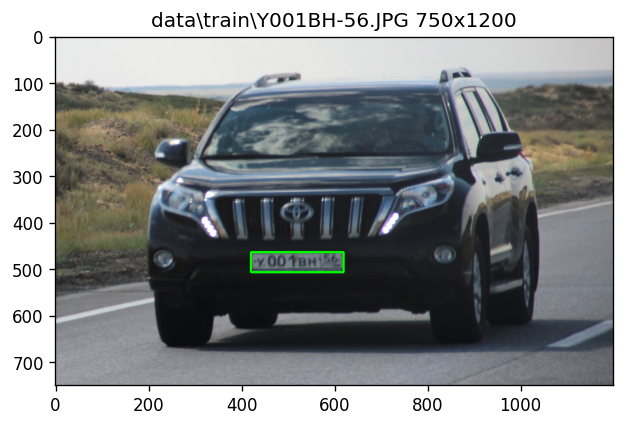

In [9]:
from matplotlib import pyplot as plt


annotation = boxes['autonumber'][2]

img = draw_boxes(annotation)

plt.figure(figsize=(6, 6), dpi=120)
plt.imshow(img)
plt.title('{} {}x{}'.format(
    annotation['filename'], img.shape[0], img.shape[1]));

In [10]:
[box['annotation']
                   for box in sum(boxes.values(), [])]

[{'class': 'rect',
  'width': 189.0,
  'height': 69.0,
  'x': 984.5,
  'y': 540.5,
  'number': 'Y001BC102'},
 {'class': 'rect',
  'width': 186.0,
  'height': 41.0,
  'x': 783.0,
  'y': 557.5,
  'number': 'Y001BC178'},
 {'class': 'rect',
  'width': 199.0,
  'height': 43.0,
  'x': 520.5,
  'y': 485.5,
  'number': 'Y001BH56'},
 {'class': 'rect',
  'width': 144.0,
  'height': 41.0,
  'x': 341.0,
  'y': 529.5,
  'number': 'Y001BH69'},
 {'class': 'rect',
  'width': 190.0,
  'height': 46.0,
  'x': 837.0,
  'y': 546.0,
  'number': 'Y001BK55'},
 {'class': 'rect',
  'width': 125.0,
  'height': 69.0,
  'x': 206.5,
  'y': 415.5,
  'number': 'Y001BK72'},
 {'class': 'rect',
  'width': 157.0,
  'height': 43.0,
  'x': 268.5,
  'y': 449.5,
  'number': 'Y001BM138'},
 {'class': 'rect',
  'width': 101.0,
  'height': 19.0,
  'x': 291.5,
  'y': 634.5,
  'number': 'Y001BM45'},
 {'class': 'rect',
  'width': 148.0,
  'height': 30.0,
  'x': 903.0,
  'y': 383.0,
  'number': 'Y001BM54'},
 {'class': 'rect',
  'wid

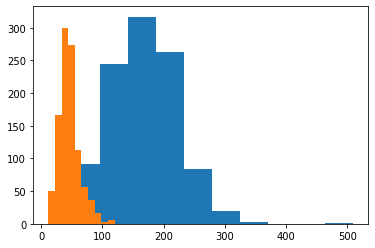

In [11]:
annotations = [box['annotation']
                   for box in sum(boxes.values(), [])]

widths = [rect['width'] for rect in annotations]
heights = [rect['height'] for rect in annotations]

plt.hist(widths)
plt.hist(heights);

In [12]:
from tensorflow.keras.applications import vgg16

IMG_HEIGHT = 750
IMG_WIDTH = 1200

features = vgg16.VGG16(weights='imagenet',
                       include_top=False,
                       input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# дообучаем последние 5 слоев
for layer in features.layers[:-5]:
    layer.trainable = False
    
feature_tensor = features.layers[-1].output
print(feature_tensor.shape)

(None, 23, 37, 512)


In [13]:
FEATURE_SHAPE = (feature_tensor.shape[1],
                 feature_tensor.shape[2])

GRID_STEP_H = IMG_HEIGHT / FEATURE_SHAPE[0]
GRID_STEP_W = IMG_WIDTH / FEATURE_SHAPE[1]

ANCHOR_WIDTH = 50.
ANCHOR_HEIGHT = 200. 

# сетка якорей, размер определяется соотношением 
# размера входного изображения и размером тензора признаков
ANCHOR_CENTERS = np.mgrid[GRID_STEP_H/2:IMG_HEIGHT:GRID_STEP_H,
                          GRID_STEP_W/2:IMG_WIDTH:GRID_STEP_W]

In [14]:
def iou(rect, x_scale, y_scale, anchor_x, anchor_y,
        anchor_w=ANCHOR_WIDTH, anchor_h=ANCHOR_HEIGHT):
    
    rect_x1 = (rect['x'] - rect['width'] / 2) * x_scale
    rect_x2 = (rect['x'] + rect['width'] / 2) * x_scale
    
    rect_y1 = (rect['y'] - rect['height'] / 2) * y_scale
    rect_y2 = (rect['y'] + rect['height'] / 2) * y_scale
    
    anch_x1, anch_x2 = anchor_x - anchor_w / 2, anchor_x + anchor_w / 2
    anch_y1, anch_y2 = anchor_y - anchor_h / 2, anchor_y + anchor_h / 2
    
    dx = (min(rect_x2, anch_x2) - max(rect_x1, anch_x1))
    dy = (min(rect_y2, anch_y2) - max(rect_y1, anch_y1))
    
    intersection = dx * dy if (dx > 0 and dy > 0) else 0.
    
    anch_square = (anch_x2 - anch_x1) * (anch_y2 - anch_y1)
    rect_square = (rect_x2 - rect_x1) * (rect_y2 - rect_y1)
    union = anch_square + rect_square - intersection
    
    return intersection / union

def encode_anchors(annotation, img_shape, iou_thr=0.5):
    encoded = np.zeros(shape=(FEATURE_SHAPE[0],
                              FEATURE_SHAPE[1], 5), dtype=np.float32)
    x_scale = 1. * IMG_WIDTH / img_shape[1]
    y_scale = 1. * IMG_HEIGHT / img_shape[0]
    for rect in [annotation['annotation']]:
        scores = []
        for row in range(FEATURE_SHAPE[0]):
            for col in range(FEATURE_SHAPE[1]):
                anchor_x = ANCHOR_CENTERS[1, row, col]
                anchor_y = ANCHOR_CENTERS[0, row, col]
                score = iou(rect, x_scale, y_scale, anchor_x, anchor_y)
                scores.append((score, anchor_x, anchor_y, row, col))
        
        scores = sorted(scores, reverse=True)
        if scores[0][0] < iou_thr:
            scores = [scores[0]]  # default anchor
        else:
            scores = [e for e in scores if e[0] > iou_thr]

        for score, anchor_x, anchor_y, row, col in scores:
            dx = (anchor_x - rect['x'] * x_scale) / ANCHOR_WIDTH
            dy = (anchor_y - rect['y'] * y_scale) / ANCHOR_HEIGHT
            dw = (ANCHOR_WIDTH - rect['width'] * x_scale) / ANCHOR_WIDTH
            dh = (ANCHOR_HEIGHT - rect['height'] * y_scale) / ANCHOR_HEIGHT
            encoded[row, col] = [1., dx, dy, dw, dh]
            
    return encoded

def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def decode_prediction(prediction, conf_thr=0.1):
    rectangles = []
    for row in range(FEATURE_SHAPE[0]):
        for col in range(FEATURE_SHAPE[1]):
            logit, dx, dy, dw, dh = prediction[row, col]
            conf = _sigmoid(logit)
            if conf > conf_thr:
                anchor_x = ANCHOR_CENTERS[1, row, col]
                anchor_y = ANCHOR_CENTERS[0, row, col]
                rectangles.append({'x': anchor_x - dx * ANCHOR_WIDTH,
                                   'y': anchor_y - dy * ANCHOR_HEIGHT,
                                   'width': ANCHOR_WIDTH - dw * ANCHOR_WIDTH,
                                   'height': ANCHOR_HEIGHT - dh * ANCHOR_HEIGHT,
                                   'conf': conf})
    return rectangles

def non_max_suppression(rectangles, max_output_size, iou_threshold=0.5):
    if not rectangles:
        return rectangles
    
    boxes = [[r['y'],
              r['x'],
              r['y'] + r['height'],
              r['x'] + r['width']] for r in rectangles]
    scores = [r['conf'] for r in rectangles]
    
    boxes = tf.dtypes.cast(boxes,tf.float32)
    scores = tf.dtypes.cast(scores,tf.float32)
    
    indices = tf.image.non_max_suppression(np.array(boxes),
                                           np.array(scores),
                                           max_output_size,
                                           iou_threshold)
    
    return [rectangles[i] for i in indices]

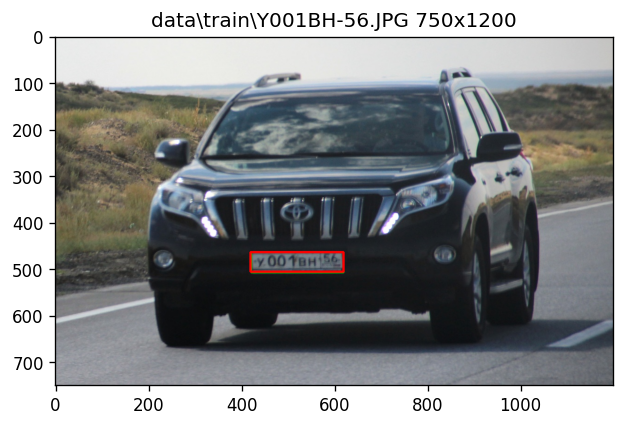

In [15]:
annotation = boxes['autonumber'][2]
encoded = encode_anchors(annotation,
                         img_shape=(IMG_HEIGHT, IMG_WIDTH),
                         iou_thr=0.5)

decoded = decode_prediction(encoded, conf_thr=0.7)
decoded = sorted(decoded, key = lambda e: -e['conf'])
plt.figure(figsize=(6, 6), dpi=120)
plt.imshow(draw_boxes(annotation, decoded[0]))
plt.title('{} {}x{}'.format(
    annotation['filename'], img.shape[0], img.shape[1]));

In [16]:
K = tf.keras.backend

def confidence_loss(y_true, y_pred):
    conf_loss = K.binary_crossentropy(y_true[..., 0], 
                                      y_pred[..., 0],
                                      from_logits=True)
    return conf_loss

def smooth_l1(y_true, y_pred):
    abs_loss = K.abs(y_true[..., 1:] - y_pred[..., 1:])
    square_loss = 0.5 * K.square(y_true[..., 1:] - y_pred[..., 1:])
    mask = K.cast(K.greater(abs_loss, 1.), 'float32')
    total_loss = (abs_loss - 0.5) * mask + 0.5 * square_loss * (1. - mask)
    return K.sum(total_loss, axis=-1)

def total_loss(y_true, y_pred, neg_pos_ratio=3):
    batch_size = K.shape(y_true)[0]
    
    # TODO: добавьте функцию потерь для классификации детекции
    
    y_true = K.reshape(y_true, (batch_size, -1, 5))
    y_pred = K.reshape(y_pred, (batch_size, -1, 5))

    # confidence loss
    conf_loss = confidence_loss(y_true, y_pred)
    
    # smooth l1 loss
    loc_loss = smooth_l1(y_true, y_pred)
    
    # positive examples loss
    pos_conf_loss = K.sum(conf_loss * y_true[..., 0], axis=-1)
    pos_loc_loss = K.sum(loc_loss * y_true[..., 0], axis=-1)
    
    # negative examples loss
    anchors = K.shape(y_true)[1]
    num_pos = K.sum(y_true[..., 0], axis=-1)
    num_pos_avg = K.mean(num_pos)
    num_neg = K.min([neg_pos_ratio * (num_pos_avg) + 1., K.cast(anchors, 'float32')])
    
    # hard negative mining
    neg_conf_loss, _ = tf.nn.top_k(conf_loss * (1. - y_true[..., 0]),
                                   k=K.cast(num_neg, 'int32'))

    neg_conf_loss = K.sum(neg_conf_loss, axis=-1)
    
    # total conf loss
    total_conf_loss = (neg_conf_loss + pos_conf_loss) / (num_neg + num_pos + 1e-32)
    loc_loss = pos_loc_loss / (num_pos + 1e-32)
    
    return total_conf_loss + 0.5 * loc_loss

In [17]:
from random import shuffle

def load_img(path, target_size=(IMG_WIDTH, IMG_HEIGHT)):
    img = plt.imread(path, cv2.IMREAD_COLOR)[...,::-1]
    img_shape = img.shape
    img_resized = cv2.resize(img, target_size)
    return img_shape, vgg16.preprocess_input(img_resized.astype(np.float32))

def data_generator(boxes, batch_size=32):
    boxes = sum(boxes.values(), [])
    while True:
        shuffle(boxes)
        for i in range(len(boxes)//batch_size):
            X, y = [], []
            for j in range(i*batch_size,(i+1)*batch_size):
                img_shape, img = load_img(boxes[j]['filename'])
                # TODO: добавьте one-hot encoding в разметку для классов
                y.append(encode_anchors(boxes[j], img_shape))
                X.append(img)
            yield np.array(X), np.array(y)

In [18]:
output = tf.keras.layers.BatchNormalization()(feature_tensor)

output = tf.keras.layers.Conv2D(512,
                                kernel_size=(1, 1), 
                                activation='linear',
                                kernel_regularizer='l2')(output)

# TODO: добавьте выходы для классификации детекции
output = tf.keras.layers.Conv2D(5,
                                kernel_size=(1, 1), 
                                activation='linear',
                                kernel_regularizer='l2')(output)

model = tf.keras.models.Model(inputs=features.inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 750, 1200, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 750, 1200, 64)     1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 750, 1200, 64)     36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 375, 600, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 375, 600, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 375, 600, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 187, 300, 128)     0     

In [19]:
adam = tf.keras.optimizers.Adam(lr=3e-4, decay=1e-6)
model.compile(optimizer=adam, 
              loss=total_loss,
              metrics=[confidence_loss])

In [20]:
model.load_weights('autonumber_detector.hdf5')

In [21]:
batch_size = 4

gen = data_generator(boxes, batch_size=batch_size)
steps_per_epoch = sum(map(len, boxes.values()), 0) / batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'autonumber_detector.hdf5',
    monitor='loss',
    verbose=1,  
    save_best_only=True, 
    save_weights_only=False,
    mode='auto',
    save_freq=10)
with tf.device("/device:GPU:0"):
    model.fit(gen, 
              steps_per_epoch=steps_per_epoch,
              epochs=50,
              callbacks=[checkpoint])

  ...
    to  
  ['...']
Train for 255.5 steps
Epoch 1/50
  1/255 [..............................] - ETA: 12:02

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Conv2D (defined at <ipython-input-21-73f4fbb1cd75>:18) ]] [Op:__inference_distributed_function_2719]

Function call stack:
distributed_function


In [42]:
model.load_weights('autonumber_detector.hdf5')

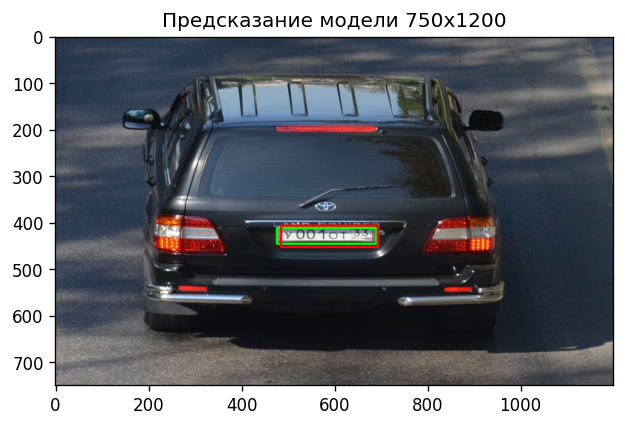

In [43]:
annotation = boxes['autonumber'][10]

_, sample_img = load_img(annotation['filename'])
pred = model.predict(np.array([sample_img,]))

decoded = decode_prediction(pred[0], conf_thr=0.1
                           )
decoded = non_max_suppression(decoded,
                              max_output_size=1,
                              iou_threshold=0.1)

plt.figure(figsize=(6, 6), dpi=120)
img = draw_boxes(annotation, decoded[0], (IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)
plt.title('Предсказание модели {}x{}'.format(*img.shape));

In [44]:
_, sample_img = load_img('data\А410АА-99.JPG')
pred = model.predict(np.array([sample_img,]))

decoded = decode_prediction(pred[0], conf_thr=0.01)
# decoded = non_max_suppression(decoded,
#                               max_output_size=5,
#                               iou_threshold=0.1)
print(decoded)
# annotation = {'filename':'А410АА-99.JPG',
#               'annotation': decoded[0]}

# plt.figure(figsize=(6, 6), dpi=120)
# img = draw_boxes(annotation, decoded[0], (IMG_WIDTH, IMG_HEIGHT))
# plt.imshow(img)
# plt.title('Предсказание модели {}x{}'.format(*img.shape));

[{'x': 803.8650509473441, 'y': 357.98123362271684, 'width': 214.22226428985596, 'height': 48.84237051010132, 'conf': 0.9907340485424996}]


In [45]:
decoded

[{'x': 803.8650509473441,
  'y': 357.98123362271684,
  'width': 214.22226428985596,
  'height': 48.84237051010132,
  'conf': 0.9907340485424996}]

In [46]:
def img_find_number(image_path):
    _, sample_img = load_img(image_path)
    pred = model.predict(np.array([sample_img,]))

    decoded = decode_prediction(pred[0], conf_thr=0)
    decoded = non_max_suppression(decoded,
                                  max_output_size=1,
                                  iou_threshold=0.1)

    annotation = {'filename':image_path}

    plt.figure(figsize=(6, 6), dpi=120)
    img = draw_boxes(annotation, decoded[0], (IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
    plt.title('Предсказание модели {}x{}'.format(*img.shape));
    
    return decoded

[{'x': 803.8650509473441,
  'y': 357.98123362271684,
  'width': 214.22226428985596,
  'height': 48.84237051010132,
  'conf': 0.9907340485424996}]

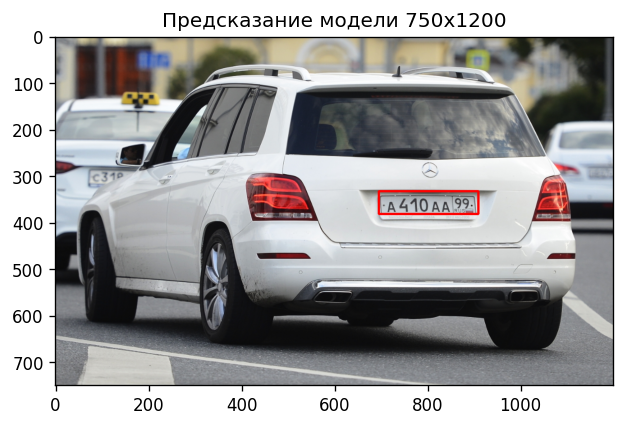

In [47]:
img_find_number('data\А410АА-99.JPG')

[{'x': 540.1811168000505,
  'y': 619.1559865422871,
  'width': 135.8815312385559,
  'height': 49.32205677032471,
  'conf': 0.0856572806924103}]

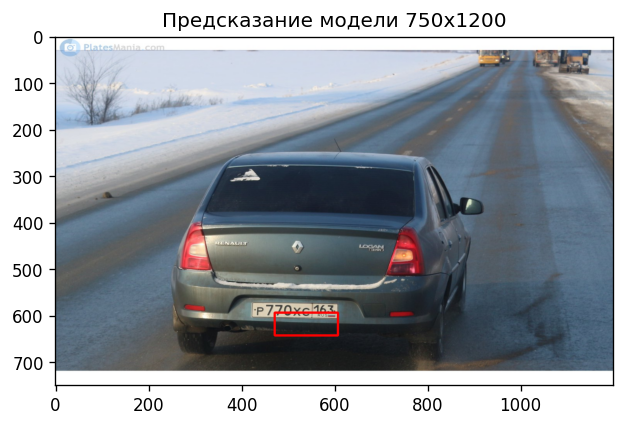

In [48]:
img_find_number('data\Р770ХС-163.JPG')

[{'x': 1065.7970735350173,
  'y': 537.0321591263232,
  'width': 122.16293811798096,
  'height': 84.06975269317627,
  'conf': 0.9984134495545758}]

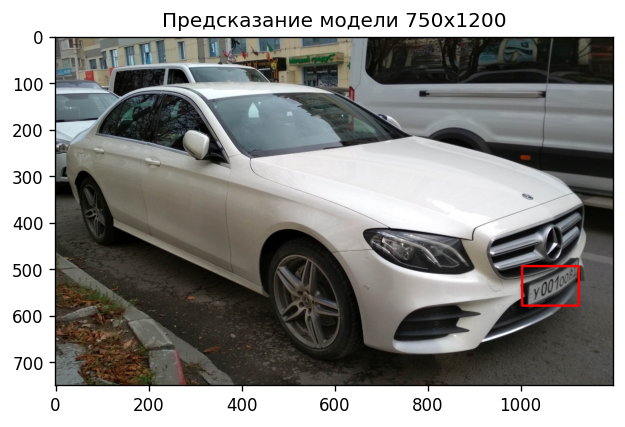

In [49]:
img_find_number('data\Y001OO-61.JPG')